In [1]:
%matplotlib inline

import itertools
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [2]:
data=pd.read_csv('train.csv', encoding = "ISO-8859-1")
#test_data=pd.read_csv('test.csv', encoding = "ISO-8859-1")

In [3]:
# Data Cleaning and Pre-processing

def preProcessString(text):
    #Strips quotes at end of text
    text=text.strip('')
    #Rmoving twitter handles @user
    text=re.sub("@[\w]*"," ",text) 
    # Remove URLs with the space
    text = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' ', text)
    # Strip space, " and ' from text
    text = text.strip(' "\'')
    #Remove repeated letters of string such as jusssssst to just 
    text=re.sub(r'(.)\1{3,}', r'\1', text)
    # remove all special characters
    text = re.sub('[^A-Za-z]', ' ', text)
    #replace two or more dots with space
    text = re.sub("\\.{2,}"," ",text);
    # converting all text into small letters and store them as words for further processing
    text_list = text.lower().split()
     # stemming the words (removing prefix and postfix) using Porter stemming algorithm..
    text_list = [ps.stem(word) for word in text_list]
    return ' '.join(text_list)
    

In [4]:
data['Preprocessed_data']=data['SentimentText'].apply(preProcessString)

In [5]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
Count_vectorization=CountVectorizer()
tf_idf_transform = TfidfTransformer()

In [6]:
train, test = train_test_split(data, test_size=0.20)

In [7]:
#Count_vectorization=CountVectorizer(ngram_range = (1, 2))

X_train_count_vect = Count_vectorization.fit_transform(train["Preprocessed_data"])
X_train_tf_idf_vector = tf_idf_transform.fit_transform(X_train_count_vect)

X_test_count_vect = Count_vectorization.transform(test["Preprocessed_data"])
X_test_tf_idf_vector = tf_idf_transform.transform(X_test_count_vect)

y_train = train['Sentiment']

y_test = test['Sentiment']

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

predict_Text=dict()

In [22]:
MultiNaive = MultinomialNB().fit(X_train_tf_idf_vector, y_train)
predict_Text['Multinomial'] = MultiNaive.predict(X_test_tf_idf_vector)


BerNaive = BernoulliNB().fit(X_train_tf_idf_vector, y_train)
predict_Text['Bernoulli'] = BerNaive.predict(X_test_tf_idf_vector)

GausNaive = BernoulliNB().fit(X_train_tf_idf_vector, y_train)
predict_Text['Gaussian'] = GausNaive.predict(X_test_tf_idf_vector)

lg1 = LogisticRegression(max_iter=1000, solver='lbfgs')
lgReg_result = lg1.fit(X_train_tf_idf_vector, y_train)
predict_Text['Logistic'] = lgReg_result.predict(X_test_tf_idf_vector)


Dc_Tree_model=DecisionTreeClassifier()
decisionTree_result=Dc_Tree_model.fit(X_train_tf_idf_vector, y_train)
predict_Text['DecisionTree'] = decisionTree_result.predict(X_test_tf_idf_vector)

svm = linear_model.SGDClassifier(max_iter=10000, tol=1e-3)
SVM_SGD_result=svm.fit(X_train_tf_idf_vector, y_train)
predict_Text['SVM SGD'] = SVM_SGD_result.predict(X_test_tf_idf_vector)

Rnd_For = RandomForestClassifier(random_state=1,  n_estimators=100,  )
Rnd_For_result=Rnd_For.fit(X_train_tf_idf_vector, y_train)
predict_Text['Random_Forest'] = Rnd_For_result.predict(X_test_tf_idf_vector)

KNN = KNeighborsClassifier(n_neighbors=1)
KNN_result=svm.fit(X_train_tf_idf_vector, y_train)
predict_Text['KNN'] = KNN_result.predict(X_test_tf_idf_vector)

In [23]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

print("Mulitnomial Naive Bayesian Classification Report")
print(precision_recall_fscore_support(y_test, predict_Text['Multinomial'], average='binary'))
print("Accuracy  %0.3f%%" %(accuracy_score(y_test,predict_Text['Multinomial'])*100))
print('=============================================================================================================')
print("Bernoulli Naive Bayesian Classification Report")
print(precision_recall_fscore_support(y_test, predict_Text['Bernoulli'], average='binary'))
print("Accuracy %0.3f%%" %(accuracy_score(y_test,predict_Text['Bernoulli'])*100))
print('=============================================================================================================')
print("Gaussian Naive Bayesian Classification Report")
print(precision_recall_fscore_support(y_test, predict_Text['Gaussian'], average='binary'))
print("Accuracy %0.3f%%" %(accuracy_score(y_test,predict_Text['Gaussian'])*100))
print('=============================================================================================================')
print("Logistic Classification Report")
print(precision_recall_fscore_support(y_test, predict_Text['Logistic'], average='binary'))
print("Accuracy  %0.3f%%" %(accuracy_score(y_test,predict_Text['Logistic'])*100))
print('=============================================================================================================')
print("Decision Tree Classification Report")
print(precision_recall_fscore_support(y_test, predict_Text['DecisionTree'], average='binary'))
print("Accuracy  %0.3f%%" %(accuracy_score(y_test,predict_Text['DecisionTree'])*100))
print('=============================================================================================================')
print("SVM SGD Classification Report")
print(precision_recall_fscore_support(y_test, predict_Text['SVM SGD'], average='binary'))
print("Accuracy  %0.3f%%" %(accuracy_score(y_test,predict_Text['SVM SGD'])*100))
print('=============================================================================================================')
print("Random_Forest Classification Report")
print(precision_recall_fscore_support(y_test, predict_Text['Random_Forest'], average='binary'))
print("Accuracy  %0.3f%%" %(accuracy_score(y_test,predict_Text['Random_Forest'])*100))
print('=============================================================================================================')
print("KNN Classification Report")
print(precision_recall_fscore_support(y_test, predict_Text['KNN'], average='binary'))
print("Accuracy  %0.3f%%" %(accuracy_score(y_test,predict_Text['KNN'])*100))

Mulitnomial Naive Bayesian Classification Report
(0.7356818351083637, 0.8698485382176823, 0.7971593430980914, None)
Accuracy  74.862%
Bernoulli Naive Bayesian Classification Report
(0.7574734414889237, 0.8099682986967242, 0.7828418230563002, None)
Accuracy 74.482%
Gaussian Naive Bayesian Classification Report
(0.7574734414889237, 0.8099682986967242, 0.7828418230563002, None)
Accuracy 74.482%
Logistic Classification Report
(0.7809021675454013, 0.8216801690736175, 0.8007723664449689, None)
Accuracy  76.783%
Decision Tree Classification Report
(0.7242046053788012, 0.7256076083127861, 0.7249054279933139, None)
Accuracy  68.727%
SVM SGD Classification Report
(0.7685155239327296, 0.8370024656569215, 0.8012982633619963, None)
Accuracy  76.428%
Random_Forest Classification Report
(0.7707867031418387, 0.8187742162733357, 0.7940561082881421, None)
Accuracy  75.883%
KNN Classification Report
(0.7623589254490543, 0.8446636139485735, 0.801403626033921, None)
Accuracy  76.228%


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

bagging1 = BaggingClassifier(base_estimator=MultiNaive, n_estimators=10, max_samples=0.8, 
                             max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=BerNaive, n_estimators=10, max_samples=0.8, 
                             max_features=0.8)
bagging3 = BaggingClassifier(base_estimator=lg1, n_estimators=10, max_samples=0.8, 
                             max_features=0.8)
bagging4 = BaggingClassifier(base_estimator=Dc_Tree_model, n_estimators=10, max_samples=0.8, 
                             max_features=0.8)
bagging5 = BaggingClassifier(base_estimator=svm, n_estimators=10, max_samples=0.8, 
                             max_features=0.8)

label = ['Multinomial','Bernoulli', 'Logistic',  'Decision Tree', 'SVM SGD','Bagging Multinomial','Bagging Bernoulli','Bagging Logistics', 'Bagging Tree','Bagging SVM SGD']

clf_list = [MultiNaive, BerNaive, lg1, Dc_Tree_model, svm, bagging1, bagging2,bagging3, bagging4, bagging5]

for clf, label in zip(clf_list, label):        
    scores = cross_val_score(clf, X_train_tf_idf_vector, y_train, cv=3, scoring='accuracy')
    print ("Accuracy: %.3f%% (+/- %.3f) [%s]" %(scores.mean()*100, scores.std(), label))
        


Accuracy: 73.862% (+/- 0.002) [Multinomial]
Accuracy: 73.870% (+/- 0.002) [Bernoulli]
Accuracy: 76.504% (+/- 0.001) [Logistic]
Accuracy: 67.970% (+/- 0.003) [Decision Tree]
Accuracy: 76.036% (+/- 0.002) [SVM SGD]
Accuracy: 72.527% (+/- 0.001) [Bagging Multinomial]
Accuracy: 73.367% (+/- 0.002) [Bagging Bernoulli]
Accuracy: 76.087% (+/- 0.001) [Bagging Logistics]
Accuracy: 72.138% (+/- 0.002) [Bagging Tree]
Accuracy: 75.697% (+/- 0.001) [Bagging SVM SGD]


In [12]:

num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

clf_list = [MultiNaive, BerNaive, Dc_Tree_model, svm]

bg_clf_cv_mean = []
bg_clf_cv_std = []
for clf in clf_list:
    for n_est, label in zip(num_est, label):     
            boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est, algorithm='SAMME')   
            boosting.fit( X_train_tf_idf_vector, y_train)
            scores = cross_val_score(boosting, X_train_tf_idf_vector, y_train, cv=3, scoring='accuracy')
            print ("Accuracy: %.3f%% (+/- %.3f) [%s] [%s]" %(scores.mean()*100, scores.std(), label, clf))

Accuracy: 56.383% (+/- 0.000) [AdaBoost (n_est=1)] [MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)]
Accuracy: 69.197% (+/- 0.002) [AdaBoost (n_est=2)] [MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)]
Accuracy: 69.197% (+/- 0.002) [AdaBoost (n_est=3)] [MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)]
Accuracy: 73.187% (+/- 0.001) [AdaBoost (n_est=10)] [MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)]
Accuracy: 56.383% (+/- 0.000) [A] [BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)]
Accuracy: 56.383% (+/- 0.000) [d] [BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)]
Accuracy: 56.383% (+/- 0.000) [a] [BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)]
Accuracy: 56.383% (+/- 0.000) [B] [BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)]
Accuracy: 68.050% (+/- 0.000) [B] [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            

In [ ]:
from mlxtend.classifier import StackingClassifier

sclf = StackingClassifier(classifiers=[ KNN, Rnd_For, GausNaive], 
                          meta_classifier=lg1)

label = ['KNN',  'Random_Forest' , 'Gaussian', 'Stacking Classifier']
clf_list = [ KNN, Rnd_For, GausNaive, sclf]

for clf, label in zip(clf_list, label):   
    scores = cross_val_score(clf, X_train_tf_idf_vector, y_train, cv=3, scoring='accuracy')
    print ("Accuracy: %.3f%% (+/- %.3f) [%s]" %(scores.mean()*100, scores.std(), label))

Accuracy: 60.893% (+/- 0.002) [KNN]
Accuracy: 75.467% (+/- 0.000) [Random_Forest]
Accuracy: 73.870% (+/- 0.002) [Gaussian]


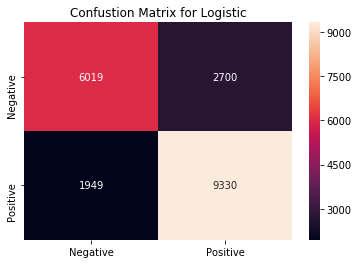

In [20]:
#Confusion Matrix for Logistic Regression
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_Text['Logistic'])
confusion_matrix_df=pd.DataFrame(cm,["Negative","Positive"],["Negative","Positive"],dtype=int)
sns.heatmap(confusion_matrix_df,annot=True,fmt="d")
plt.title("Confustion Matrix for Logistic")
plt.show()

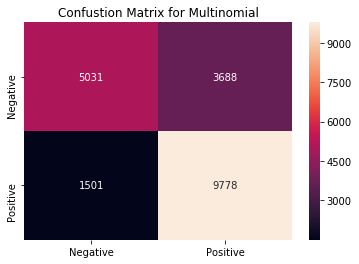

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_Text['Multinomial'])
confusion_matrix_df=pd.DataFrame(cm,["Negative","Positive"],["Negative","Positive"],dtype=int)
sns.heatmap(confusion_matrix_df,annot=True,fmt="d")
plt.title("Confustion Matrix for Multinomial")
plt.show()